Data collected from kaggle https://www.kaggle.com/datasets/sureshgupta/health-insurance-data-set/data on 10/06/2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [2]:
## Load claims data

claimsdf = pd.read_csv("healthinsurance.csv")
claimsdf.columns = claimsdf.columns.str.lower()
claimsdf.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [3]:
## check data file info

claimsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [4]:
## check for missing values
## aboti 396 missing values in the age column and 956 in bmi

claimsdf.isnull().sum()#/len(claimsdf)

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [5]:
## descriptive statistics

claimsdf.describe().T

,count,mean,std,min,25%,50%,75%,max
age,14604.0,39.547521,14.015966,18.0,27.0,40.00,52.000,64.0
weight,15000.0,64.909600,13.701935,34.0,54.0,63.00,76.000,95.0
bmi,14044.0,30.266413,6.122950,16.0,25.7,29.40,34.400,53.1
no_of_dependents,15000.0,1.129733,1.228469,0.0,0.0,1.00,2.000,5.0
smoker,15000.0,0.198133,0.398606,0.0,0.0,0.00,0.000,1.0
bloodpressure,15000.0,68.650133,19.418515,0.0,64.0,71.00,80.000,122.0
diabetes,15000.0,0.777000,0.416272,0.0,1.0,1.00,1.000,1.0
regular_ex,15000.0,0.224133,0.417024,0.0,0.0,0.00,0.000,1.0
claim,15000.0,13401.437620,12148.239619,1121.9,4846.9,9545.65,16519.125,63770.4


In [6]:
## rename regular_ex to regular exercise
claimsdf.rename(columns = {'regular_ex':'regular_exercise'}, inplace = True)

In [7]:
numeric_cols = claimsdf.select_dtypes(include=[np.number]).columns

In [8]:
categorical_cols = claimsdf.select_dtypes(include=["object"]).columns

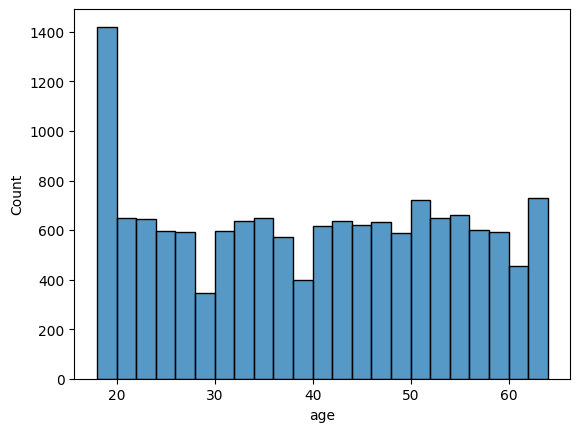

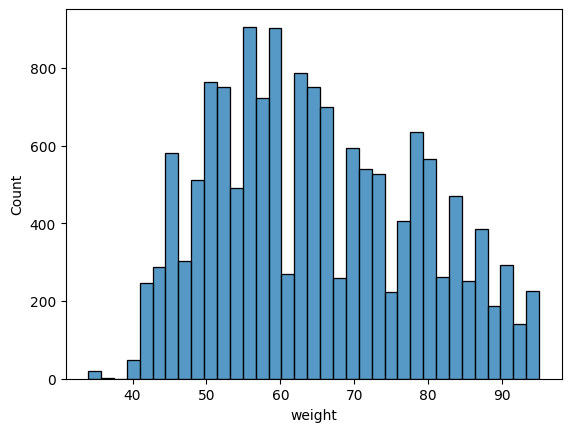

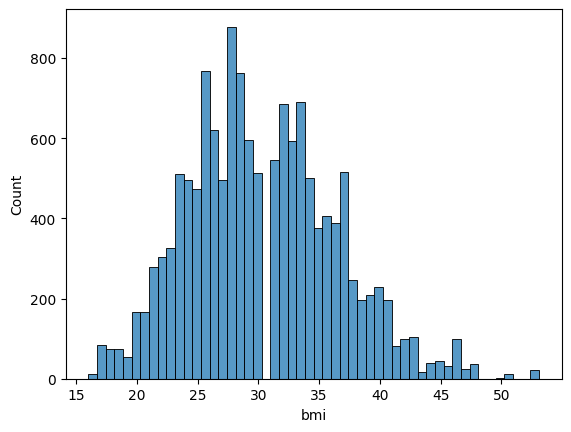

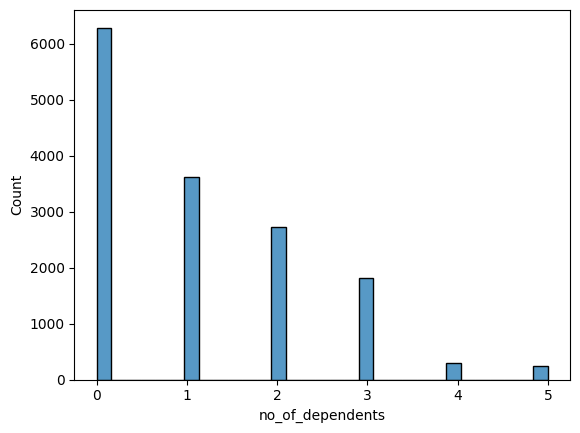

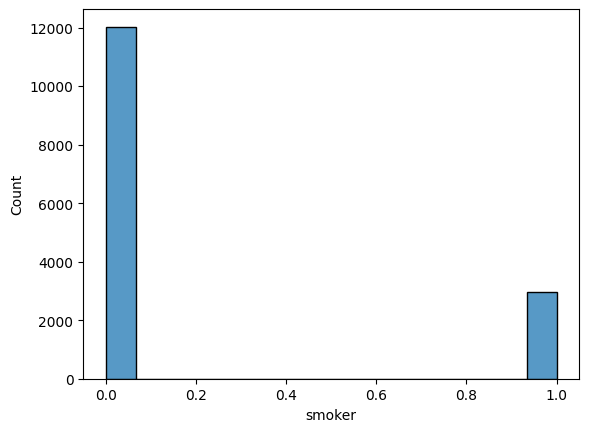

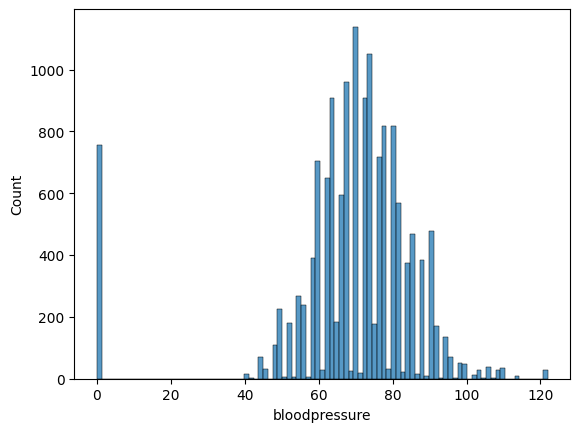

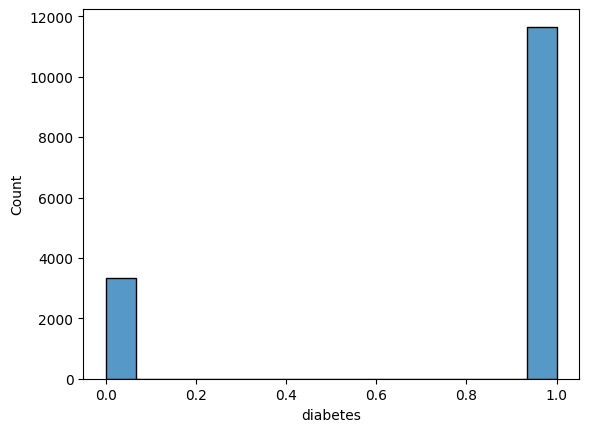

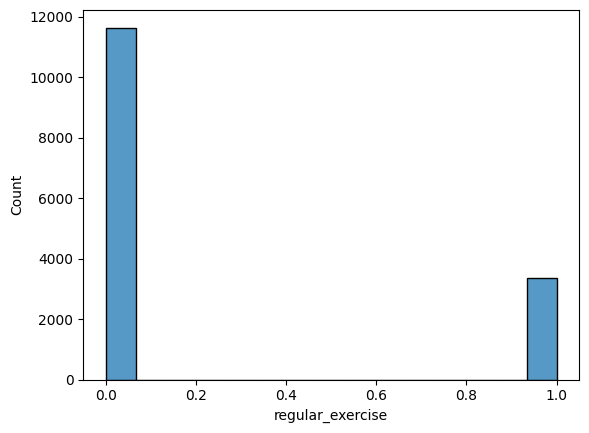

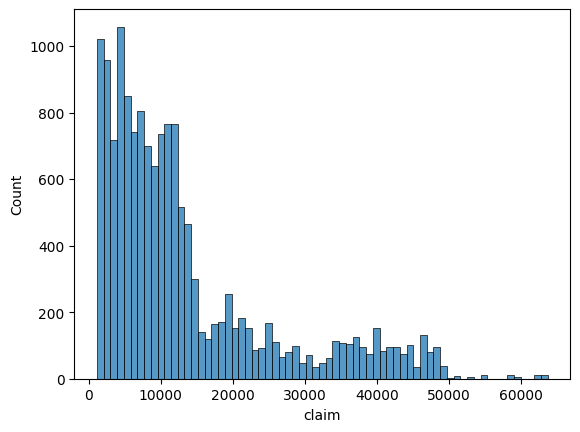

In [9]:
for n in numeric_cols:
    sns.histplot(claimsdf[n])
    plt.show()

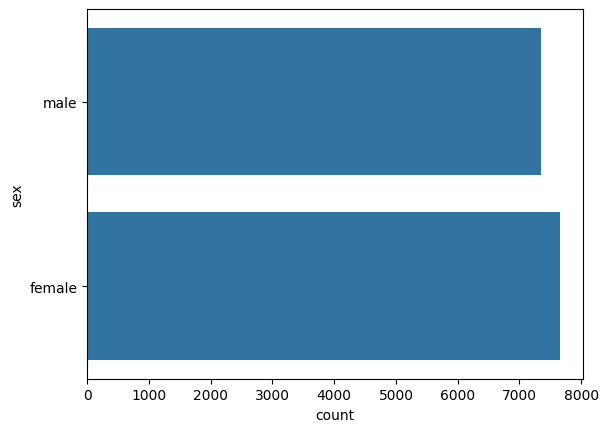

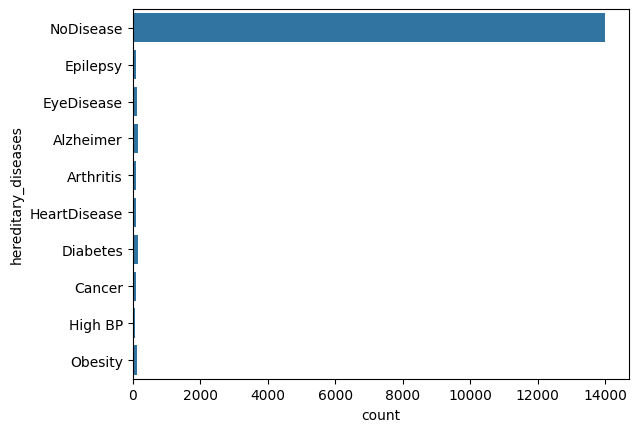

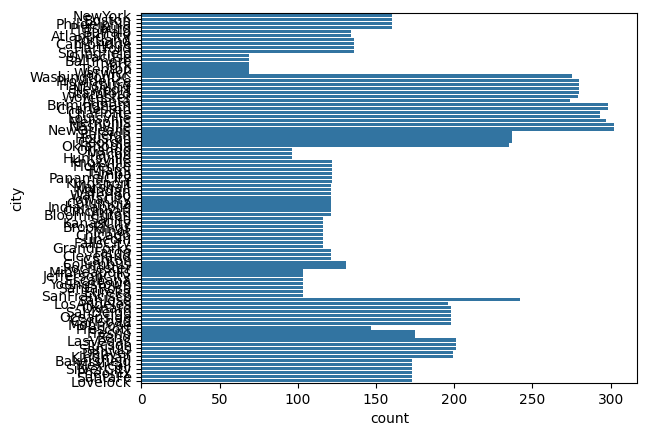

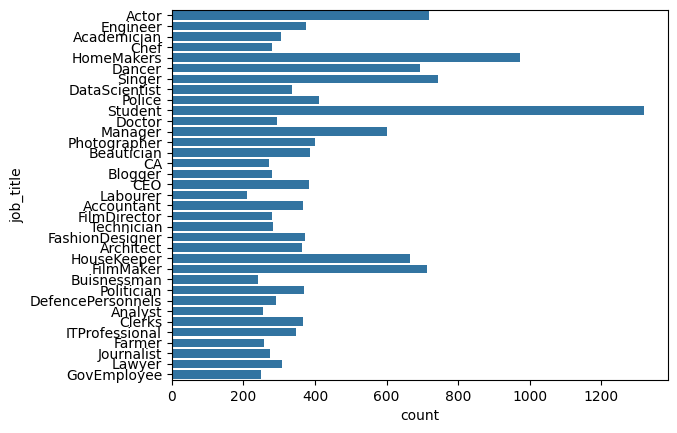

In [10]:
for c in categorical_cols:
    sns.countplot(claimsdf[c])
    plt.show()

In [11]:
claimsdf['job_title'].nunique()

35

In [12]:
claimsdf['city'].nunique()

91

In [13]:
## fill missing values in age and bmi using knn imputer

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
claimsdf[["age", "bmi"]] = imputer.fit_transform(claimsdf[["age", "bmi"]])

In [14]:
## check the descriptive statistics after imputing missing values

claimsdf.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15000.0,39.572533,13.907002,18.0,27.0,40.00,51.000,64.0
weight,15000.0,64.909600,13.701935,34.0,54.0,63.00,76.000,95.0
bmi,15000.0,30.279523,5.972020,16.0,25.8,29.60,34.200,53.1
no_of_dependents,15000.0,1.129733,1.228469,0.0,0.0,1.00,2.000,5.0
smoker,15000.0,0.198133,0.398606,0.0,0.0,0.00,0.000,1.0
bloodpressure,15000.0,68.650133,19.418515,0.0,64.0,71.00,80.000,122.0
diabetes,15000.0,0.777000,0.416272,0.0,1.0,1.00,1.000,1.0
regular_exercise,15000.0,0.224133,0.417024,0.0,0.0,0.00,0.000,1.0
claim,15000.0,13401.437620,12148.239619,1121.9,4846.9,9545.65,16519.125,63770.4


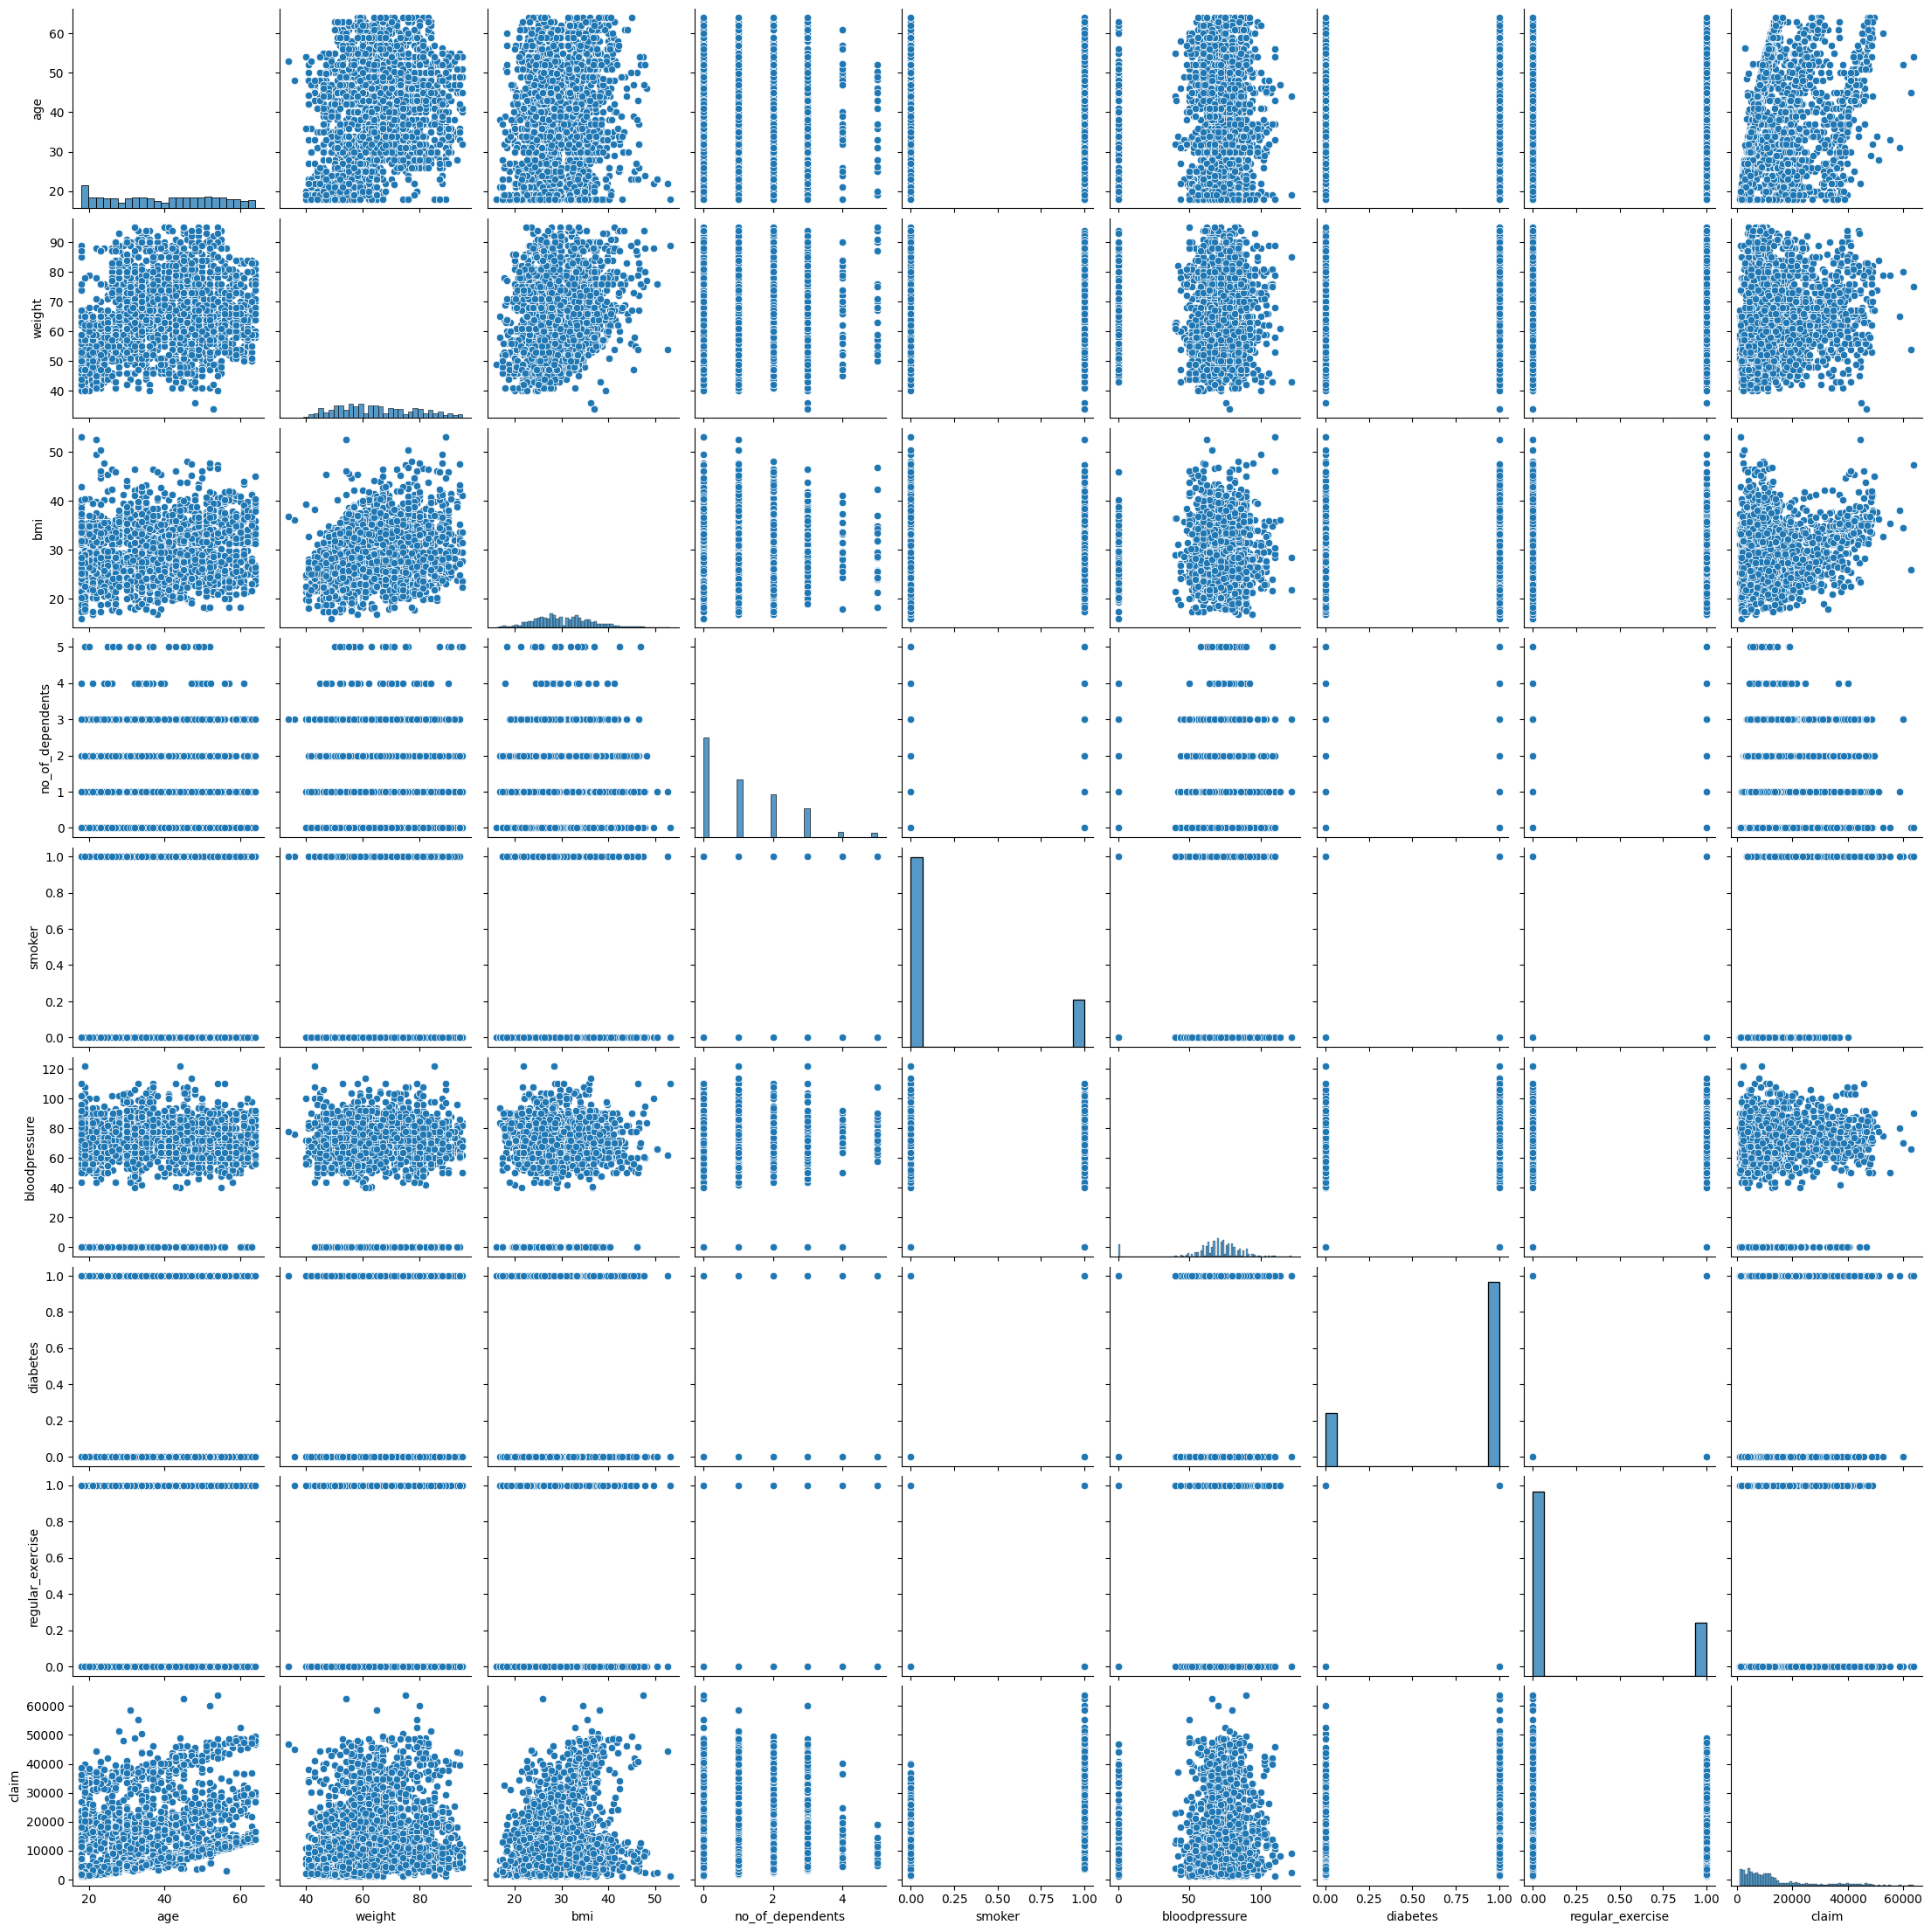

In [15]:
## pair plot

## smoker status, age, bmi, diabetes seem to have a positive correlation with claim amount
## regular exercise seems to have a negative correlation with claim amount

sns.pairplot(claimsdf)

In [16]:
## correlation matrix
claimsdf.corr(numeric_only=True)  #['claim'].sort_values(ascending=True)

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_exercise,claim
age,1.000000,0.282668,0.189878,0.059733,-0.022291,-0.007098,0.069804,0.009005,0.296411
weight,0.282668,1.000000,0.243661,0.135687,0.015499,-0.020835,-0.010490,-0.005578,0.077716
bmi,0.189878,0.243661,1.000000,0.050362,0.025554,-0.041447,0.081059,-0.041497,0.200180
no_of_dependents,0.059733,0.135687,0.050362,1.000000,0.008364,0.024849,0.065182,-0.010302,0.067614
smoker,-0.022291,0.015499,0.025554,0.008364,1.000000,0.005709,0.058164,-0.036949,0.773399
bloodpressure,-0.007098,-0.020835,-0.041447,0.024849,0.005709,1.000000,-0.016498,0.042493,0.013742
diabetes,0.069804,-0.010490,0.081059,0.065182,0.058164,-0.016498,1.000000,0.007960,0.135371
regular_exercise,0.009005,-0.005578,-0.041497,-0.010302,-0.036949,0.042493,0.007960,1.000000,-0.060492
claim,0.296411,0.077716,0.200180,0.067614,0.773399,0.013742,0.135371,-0.060492,1.000000


##### Doing a limited bivariate analysis

<Axes: xlabel='age', ylabel='claim'>

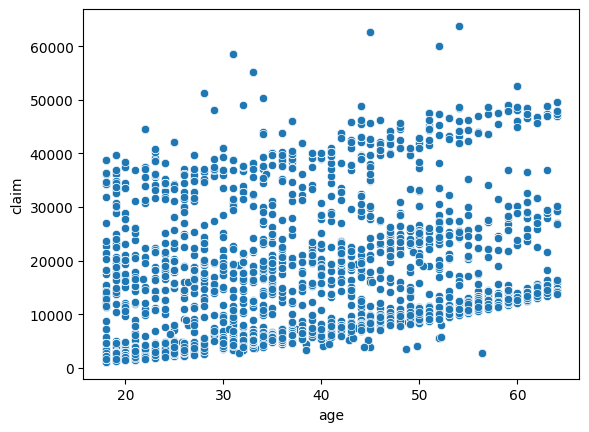

In [17]:
sns.scatterplot(x="age", y="claim", data=claimsdf)
#suggestive of a weak positive relationship between age and claim amount

<Axes: xlabel='bmi', ylabel='claim'>

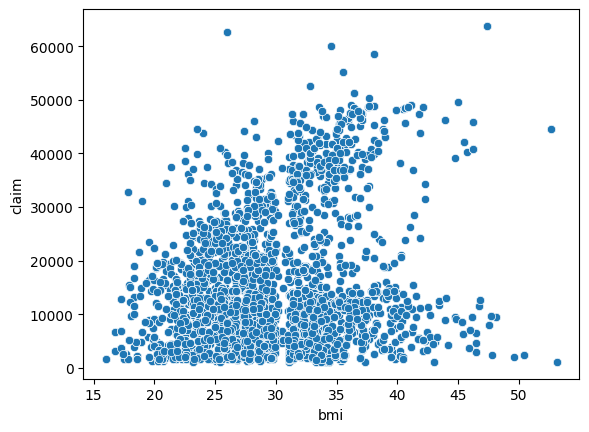

In [18]:
sns.scatterplot(x="bmi", y="claim", data=claimsdf)
## suggestive of a weak positive relationship between bmi and claim amount

<Axes: xlabel='bloodpressure', ylabel='claim'>

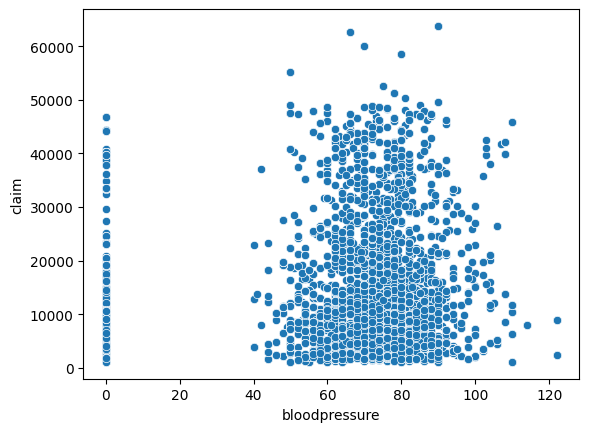

In [19]:
sns.scatterplot(x="bloodpressure", y="claim", data=claimsdf)

<Axes: xlabel='sex', ylabel='claim'>

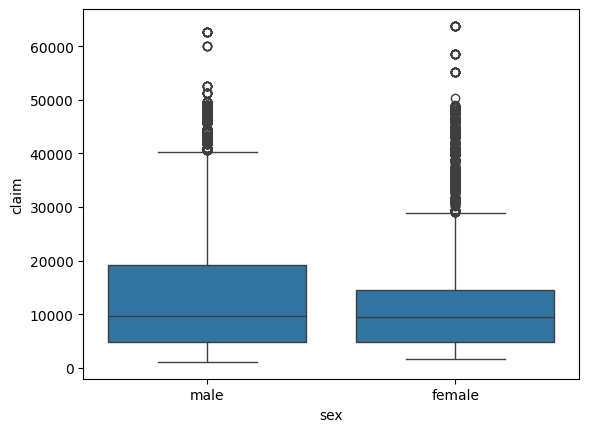

In [20]:
sns.boxplot(x="sex", y="claim", data=claimsdf)
## no significant difference in claim between male and female

<Axes: xlabel='smoker', ylabel='claim'>

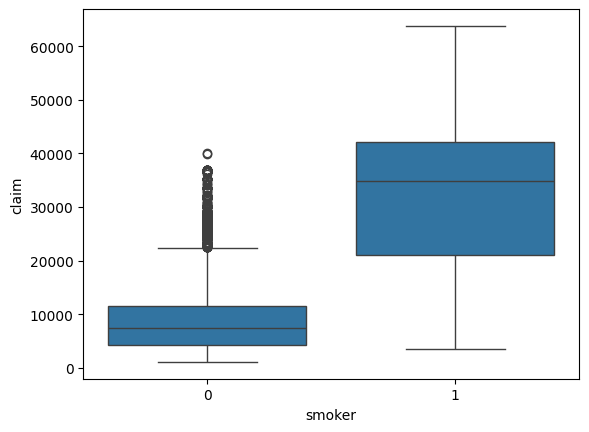

In [21]:
sns.boxplot(x="smoker", y="claim", data=claimsdf)
## smokers tend to have higher claim amounts
## some overlap with non-smokers but the median claim amount for smokers is higher
## probably will be a good predictor

<Axes: xlabel='diabetes', ylabel='claim'>

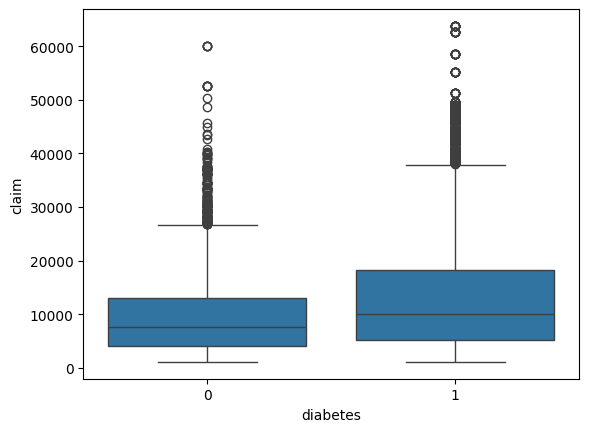

In [22]:
sns.boxplot(x="diabetes", y="claim", data=claimsdf)
## significant overlap between diabetics and non-diabetics
## this may not be a good predictor of claim amount

<Axes: xlabel='regular_exercise', ylabel='claim'>

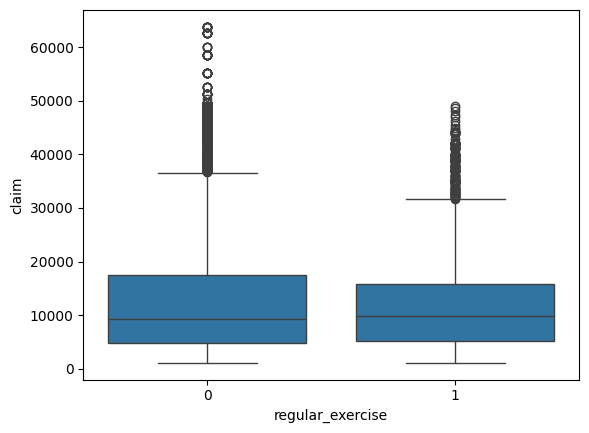

In [23]:
sns.boxplot(x="regular_exercise", y="claim", data=claimsdf)
## overlap in claims between regular exercisers and non-regular exercisers
## may not be a good predictor of claim amount

##### Multivariable analysis

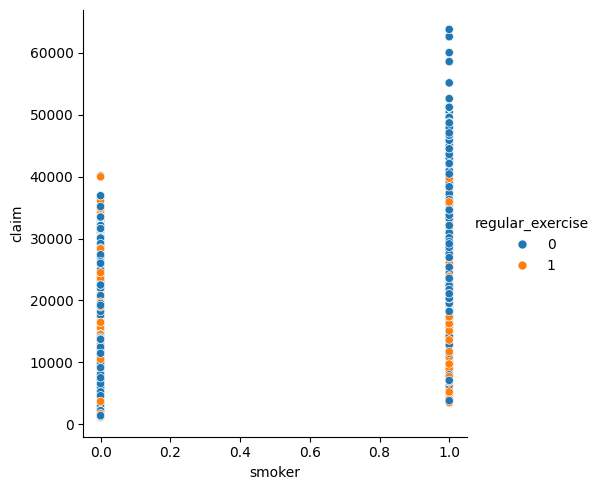

In [24]:
sns.relplot(data=claimsdf, x='smoker', y='claim', hue='regular_exercise')

## smokers whp also exercie regularly tend to have lower claim amounts

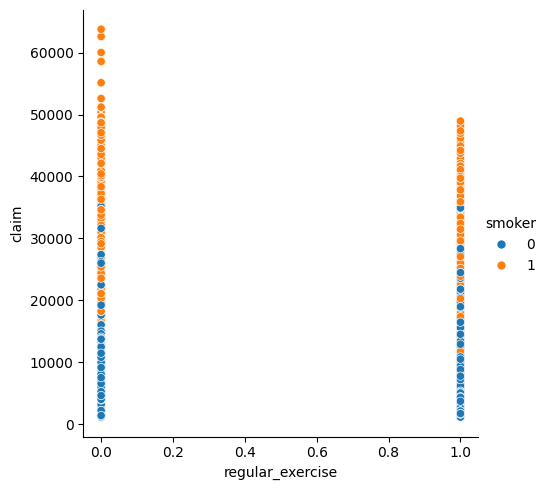

In [25]:
sns.relplot(data=claimsdf, x='regular_exercise', y='claim', hue='smoker')
## smokers generally have higher claim amounts

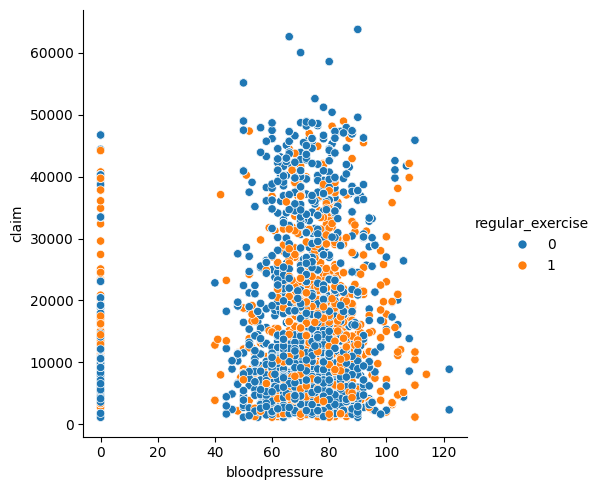

In [26]:
sns.relplot(data=claimsdf, x='bloodpressure', y='claim', hue='regular_exercise')

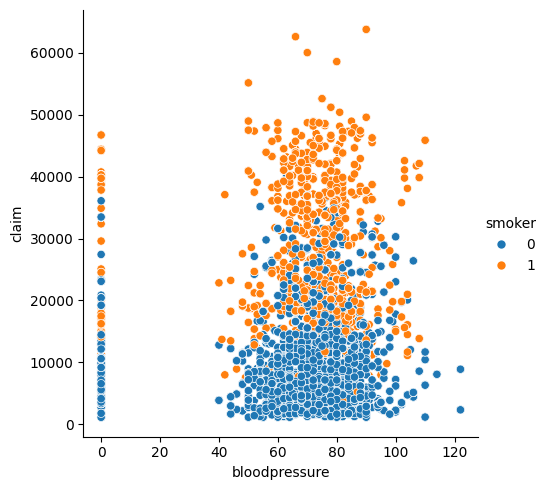

In [27]:
sns.relplot(data=claimsdf, x='bloodpressure', y='claim', hue='smoker')
## regardless of blood pressure smokers generally have higher claim amounts

EDA summary

* claim is the target feature
* claim data is right skewed and would need to be transformed (probably logarithmic)
* smoking has a strong positive relationship with claim amount
* although the correlation between weight and bmi is weak (0.24) both will not be simultaneously used as inputs since weight is incorporated in bmi
* bmi composite is used as a measure of health status but there are features including smoking status, blood pressure, diabetes status which also indicate health status
* there are 91 cities and 35 unique job titles. one-hot encoding these will eat into the degrees of freedom as such these features will not be included as model inputs


Feature engineering

In [28]:
numeric_cols

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 'bloodpressure',
       'diabetes', 'regular_exercise', 'claim'],
      dtype='object')

In [29]:
claimsdf['logclaims'] = np.log(claimsdf['claim'])

In [30]:
## scale numeric columns

minmax = StandardScaler()
claimsdf[numeric_cols] = minmax.fit_transform(claimsdf[numeric_cols])

In [32]:
## one hot encode sex and hereditary_diseases

from sklearn.preprocessing import OneHotEncoder

## create OHE instance
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

## fit and transform the columns
encoder.fit(claimsdf[["sex", "hereditary_diseases"]])
encoded_data = encoder.transform(claimsdf[["sex", "hereditary_diseases"]]).toarray()

## create a dataframe from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["sex", "hereditary_diseases"]))

## join encoded data with the original data
claimsdf = pd.concat([claimsdf, encoded_df], axis=1)

## drop the original columns
claimsdf.drop(columns=["sex", "hereditary_diseases"], inplace=True)

In [33]:
claimsdf.head()

,age,weight,bmi,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_exercise,job_title,...,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity
0,1.468911,-0.066387,-1.001290,-0.105609,-0.497082,NewYork,0.172515,-1.866629,-0.537477,Actor,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.677916,0.736446,-1.285960,-0.105609,-0.497082,Boston,0.481508,0.535725,1.860546,Engineer,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.544530,-0.066387,-2.089735,0.708439,2.011742,Phildelphia,0.996498,0.535725,1.860546,Academician,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.540820,-0.869220,1.024893,-0.105609,2.011742,Pittsburg,0.172515,0.535725,-0.537477,Chef,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.479343,-1.088175,-1.620866,-0.919658,-0.497082,Buffalo,0.687504,0.535725,-0.537477,HomeMakers,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Modeling

Plan:
* use logclaim as target
* split the data into training and test dataset
* build models to predict claims
* measure model metrics

In [34]:
## create X and y
X = claimsdf.drop(columns=['claim', 'logclaims', 'weight', 'job_title', 'city'])
y = claimsdf['logclaims']

In [35]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
## linear regression model
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [38]:
## predict on the test set
y_pred = lm.predict(X_test)

In [41]:
## calculate the mean squared error
r_squared = lm.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)  
rmse = np.sqrt(mse)


print(f"R-squared: {r_squared}")
print("========================================")
print(f"mean squared error: {mse}")
print("========================================")
print(f"root mean squared error: {rmse}")


R-squared: 0.7301124151753353
mean squared error: 0.22082478997805355
root mean squared error: 0.46991998252686973


Random Forest

In [40]:
## Random Forest Regressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)


print(f"mean squared error: {rf_mse}")
print("========================================")
print(f"root mean squared error: {rf_rmse}")

mean squared error: 0.020983949280574853
root mean squared error: 0.14485837663240209


XGBoost

In [46]:
## XGBoost Regressor
import xgboost

from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(X_train, y_train)

xgb_y_pred = xgb.predict(X_test)

xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f"mean squared error: {xgb_mse}")
print("========================================")
print(f"root mean squared error: {xgb_rmse}")

mean squared error: 0.028719311411467875
root mean squared error: 0.1694677297052978


* models developed with default hyperparameter values
* random forest regressor with a slightly lower RMSE performs better than xgboost and linear models
* performance may be improved with by parameter tuning
* to predict real values, predicitions have to be back transformed by taking the exponentials 